In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import cv2 as cv
from google.colab.patches import cv2_imshow
from PIL import Image
from numpy import asarray 
import matplotlib.image as mpimg
from scipy import ndimage
from skimage import filters, feature, measure, color
from skimage.segmentation import watershed


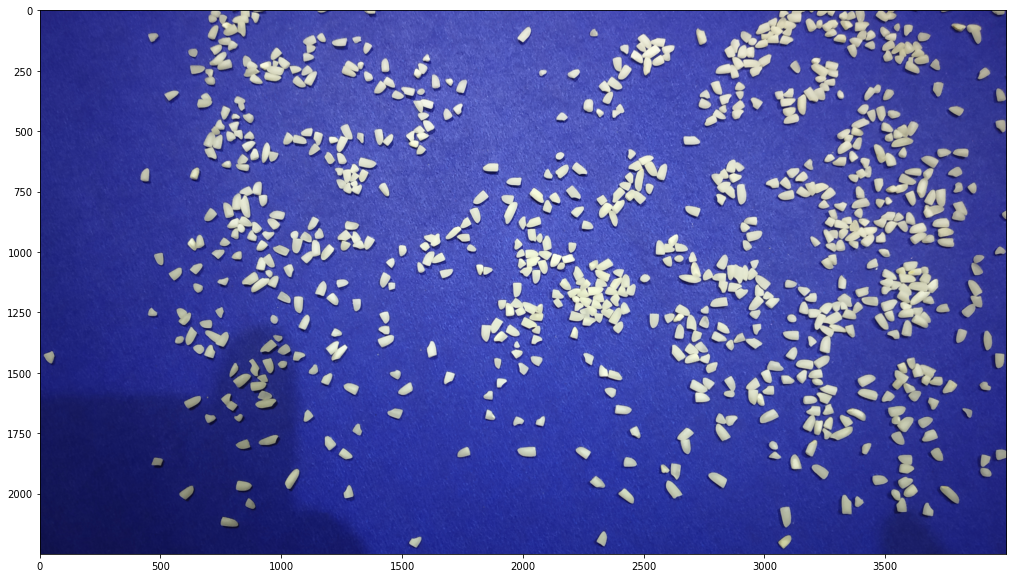

In [2]:
def imshow_(img,x=35,y=10):
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(x,y))
  plt.imshow(img)
IM=[]
im =cv2.imread('/content/drive/MyDrive/Test Data/Akaike/Grains/data/train/broken_grain_1.jpg')
IM.append(im)
im =cv2.imread('/content/drive/MyDrive/Test Data/Akaike/Grains/data/train/broken_grain_2.jpg')
IM.append(im)
im =cv2.imread('/content/drive/MyDrive/Test Data/Akaike/Grains/data/train/broken_grain_3.jpg')
IM.append(im)
im =cv2.imread('/content/drive/MyDrive/Test Data/Akaike/Grains/data/train/full_grain_1.jpg')
IM.append(im)
im =cv2.imread('/content/drive/MyDrive/Test Data/Akaike/Grains/data/train/full_grain_2.jpg')
IM.append(im)
im =cv2.imread('/content/drive/MyDrive/Test Data/Akaike/Grains/data/train/full_grain_3.jpg')
IM.append(im)
im =cv2.imread('/content/drive/MyDrive/Test Data/Akaike/Grains/data/train/full_grain_4.jpg')
IM.append(im)
im =cv2.imread('/content/drive/MyDrive/Test Data/Akaike/Grains/data/train/full_grain_5.jpg')
IM.append(im)
im =cv2.imread('/content/drive/MyDrive/Test Data/Akaike/Grains/data/train/full_grain_6.jpg')
IM.append(im)
im =cv2.imread('/content/drive/MyDrive/Test Data/Akaike/Grains/data/train/mixed_grain_1.jpg')
IM.append(im)
im =cv2.imread('/content/drive/MyDrive/Test Data/Akaike/Grains/data/train/mixed_grain_2.jpg')
IM.append(im)
im =cv2.imread('/content/drive/MyDrive/Test Data/Akaike/Grains/data/train/mixed_grain_3.jpg')
IM.append(im)
#imshow_(img)
imshow_(IM[0])

In [76]:
IM1=[]
im =cv2.imread('/content/drive/MyDrive/Test Data/Akaike/Grains/data/test/image_1.jpg')
IM1.append(im)
im =cv2.imread('/content/drive/MyDrive/Test Data/Akaike/Grains/data/test/image_2.jpg')
IM1.append(im)
im =cv2.imread('/content/drive/MyDrive/Test Data/Akaike/Grains/data/test/image_3.jpg')
IM1.append(im)
im =cv2.imread('/content/drive/MyDrive/Test Data/Akaike/Grains/data/test/image_4.jpg')
IM1.append(im)
im =cv2.imread('/content/drive/MyDrive/Test Data/Akaike/Grains/data/test/image_5.jpg')
IM1.append(im)


In [14]:
CO=[]
def append_conto(IM,better_img,CO):
  for img in IM:
    contours, hierarchy = cv.findContours(better_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    CO.append(contours)
    return CO
for img in IM:
  Grey_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  _,Tresh_img=cv2.threshold(Grey_img,120,255,cv2.THRESH_BINARY)
  kernal=np.ones((3),np.uint(8))
  better_img=cv2.morphologyEx(Tresh_img,cv2.MORPH_OPEN,kernal,iterations=12)
  contours, hierarchy = cv.findContours(better_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
  #CO=append_conto(im,better_img,CO)
  CO.append(contours)

error: ignored

529439
Number of detected contours 554
Total number of broken rice present in the Image is:  127
19.52486963497794
443671
Number of detected contours 548
Total number of broken rice present in the Image is:  182
19.193115205706807
426527
Number of detected contours 623
Total number of broken rice present in the Image is:  239
14.40753522382736
444114
Number of detected contours 664
Total number of broken rice present in the Image is:  287
12.537985274431058
713959
Number of detected contours 537
Total number of broken rice present in the Image is:  74
34.42154976205256


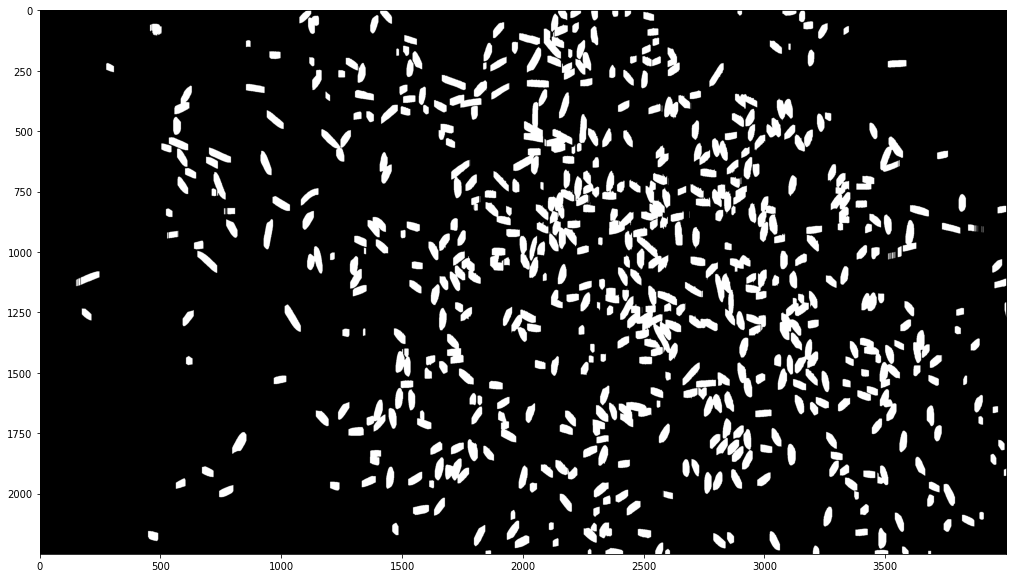

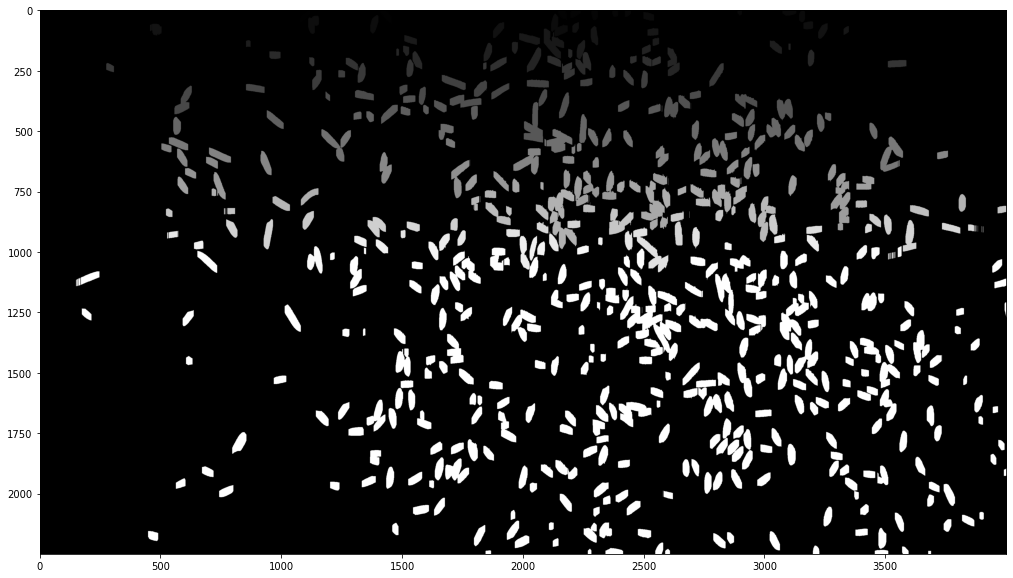

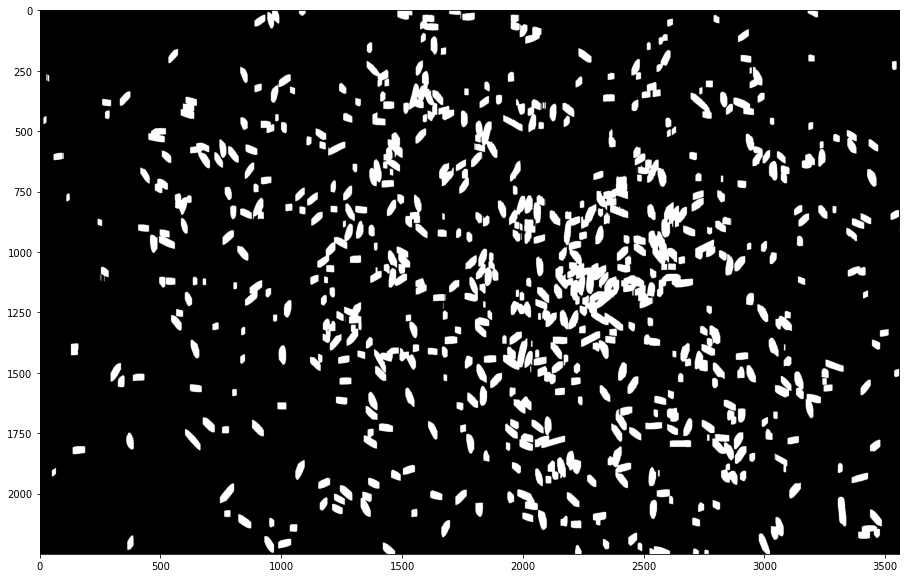

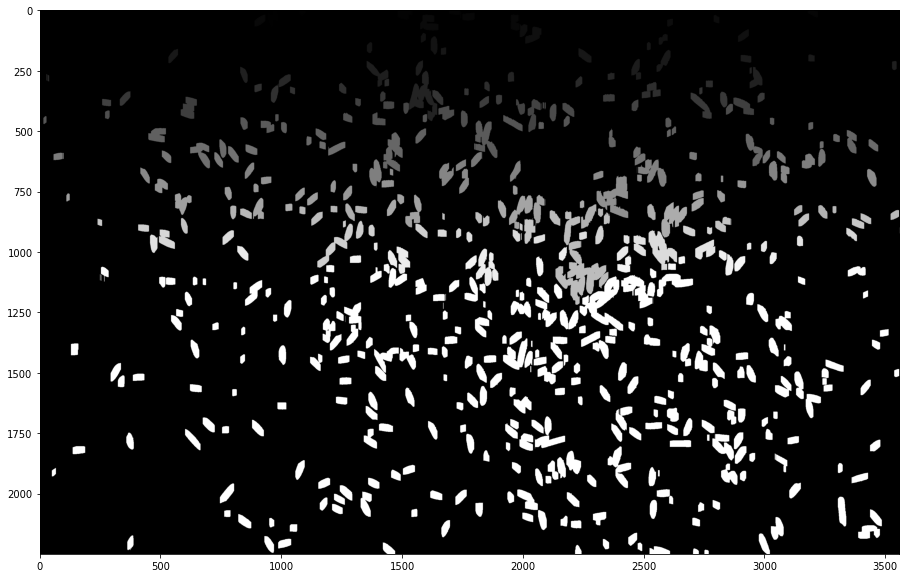

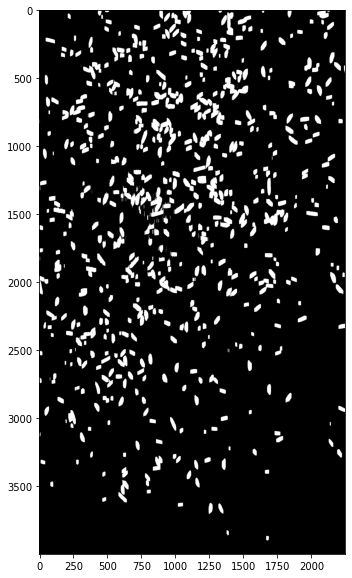

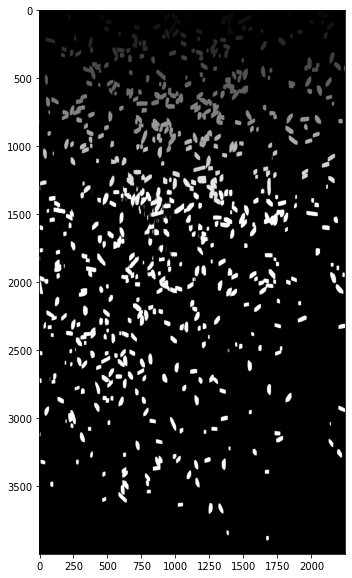

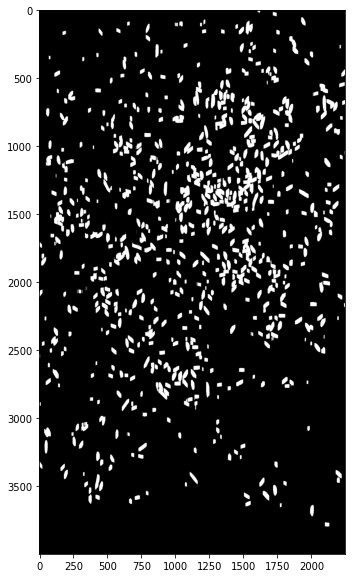

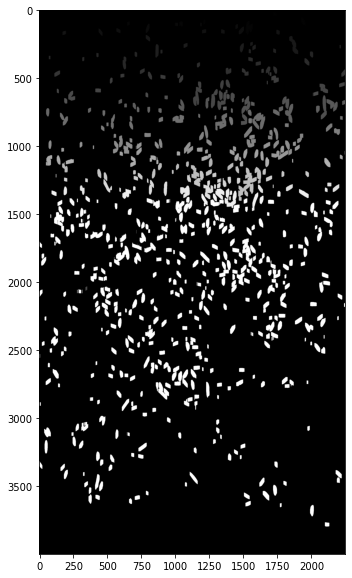

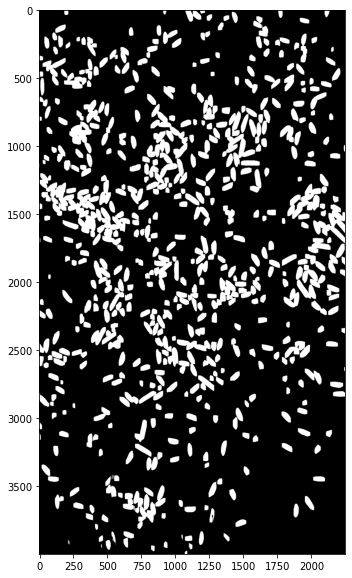

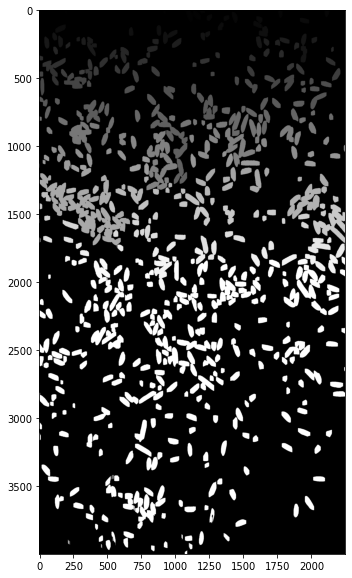

In [94]:
A=B=R=C=A1=[]
for img in IM1:
  Grey_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  _,Tresh_img=cv2.threshold(Grey_img,120,255,cv2.THRESH_BINARY)

  kernal=np.ones((3),np.uint(8))
  better_img=cv2.morphologyEx(Tresh_img,cv2.MORPH_OPEN,kernal,iterations=12)
  imshow_(better_img)

  #COUNTING 

  IMG=better_img.copy()
  count=0
  row,column=IMG.shape

  for i in range(row):
    for j in range(column):
      pix=IMG[i,j]

      if pix==255:
        count+=1
        cv.floodFill(IMG,None,(j,i),count)
  print(count)
  imshow_(IMG)



  contours, hierarchy = cv.findContours(better_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


  output_contour = cv.cvtColor(better_img, cv.COLOR_GRAY2BGR)
  cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
  print("Number of detected contours", len(contours))

  a=0
  c=[]
  b=0
  for i in contours:
      area=cv.contourArea(i) 
      c.append(area)
      a+=area
      b+=1
  count = []


  for x in contours:


    area = cv.contourArea(x)
    if area < 800 :
      count.append(x)



  print("Total number of broken rice present in the Image is: ",len(count))
  A.append(a)
  A1.append(c)
  B.append(b)
  R.append(row)
  C.append(column)
  #print(100000*(a/b)/(row*column))

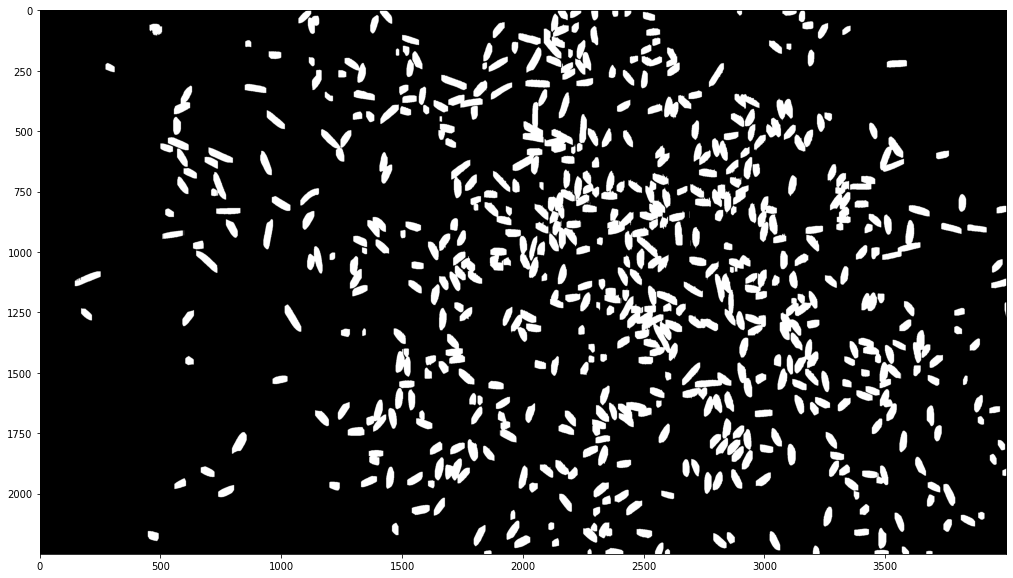

In [89]:
img=IM1[0]
Grey_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,Tresh_img=cv2.threshold(Grey_img,120,255,cv2.THRESH_BINARY)

kernal=np.ones((3),np.uint(8))
better_img=cv2.morphologyEx(Tresh_img,cv2.MORPH_OPEN,kernal,iterations=10)
imshow_(better_img)




dist_trans = ndimage.distance_transform_edt(better_img)
local_max = feature.peak_local_max(dist_trans, min_distance=16)


local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True

labels = watershed(-dist_trans, measure.label(local_max_mask), mask=better_img)

Number of Rice grains are : 670


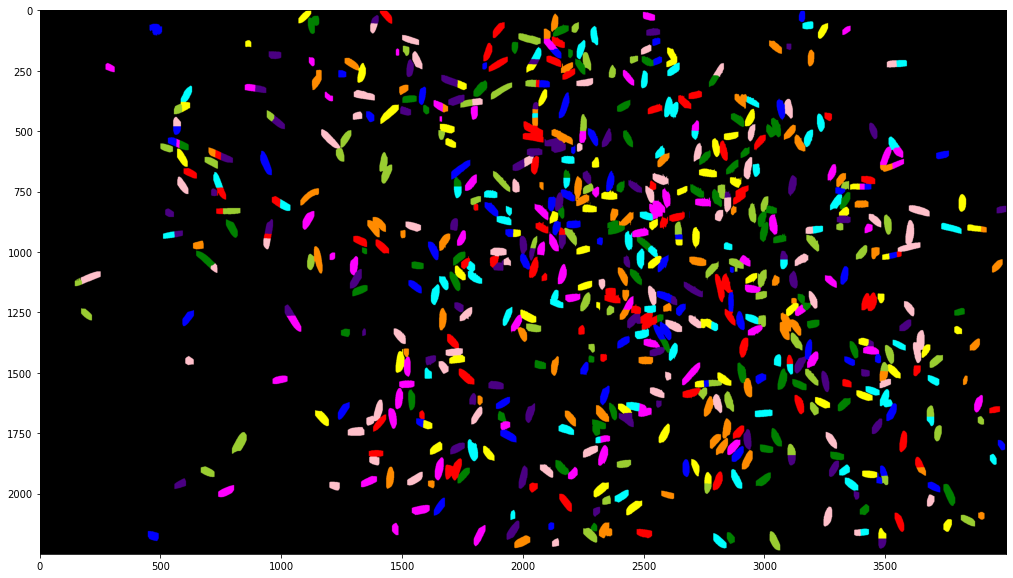

In [90]:
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels, bg_label=0))
print("Number of Rice grains are : %d" % labels.max())

In [91]:
contours, hierarchy = cv.findContours(better_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
#print(hierarchy)

In [92]:
count=0
ar=[]
for i in contours:
  area = cv.contourArea(i)
  area=area*row*column
  ar.append(area)
  if area<700 and area >100:
    print(area)
    count+=1
print(count)

0


In [98]:
for i in range(len(ar)):
  if ar[i]!=0:
    ar[i]=1/ar[i]

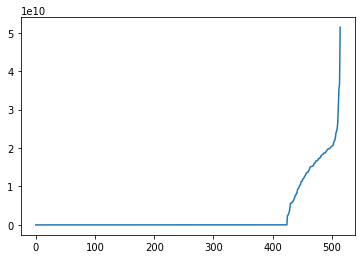

In [99]:
plt.plot(sorted(ar))

In [ ]:
import pandas as pd
import numpy as np
from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import torch
from torch.optim import Adam
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from collections import OrderedDict
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from PIL import Image
import os
from torch.optim import lr_scheduler
import copy

In [4]:
from torch.nn.modules import batchnorm
bs = 1
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout2d(0.4)
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout2d(0.3)
        )
        

        self.fc = nn.Linear(1024, 7)  # number of classes =7

    def forward(self, x):
        x = self.conv6(self.conv5(self.conv4(self.conv3(self.conv2(self.conv1(x))))))
        x = F.avg_pool2d(x, kernel_size=x.shape[2:])
        x = x.view(x.shape[0], -1)

        x = self.fc(x)
        x = F.log_softmax(x, dim=1)
        return x